In [44]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt

 
# Text Pre-processing libraries

import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
 
# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
 
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maggybarnes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/maggybarnes/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maggybarnes/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
df = pd.read_csv("Resources/labeled_data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [59]:
df.shape

(24783, 8)

In [60]:
#define target variable where 1 = hate speech or offensive language, and 0 = neither
df["target"] = df["class"].map({0: 1,
                                 1: 1,
                                 2: 0})
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,target
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...,0
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...,1
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...,1
3,3,3,0,2,1,1,rt cganderson vivabased look like tranny,1
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...,1


In [61]:
df.shape

(24783, 8)

In [ ]:
#Text Pre-Processing

In [48]:
#lower case all words before any preprocessing
df["tweet"] = df["tweet"].str.lower()

#removing punctiontions
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '',punctuations_list)
    return text.translate(temp)
df['tweet'] = df['tweet'].apply(lambda x: remove_punctuations(x))
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,target
0,0,3,0,0,3,2,rt mayasolovely as a woman you shouldnt compl...,0
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad for cuff...,1
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life you eve...,1
3,3,3,0,2,1,1,rt cganderson vivabased she look like a tranny,1
4,4,6,0,6,0,1,rt shenikaroberts the shit you hear about me ...,1


In [ ]:
df.tail()

In [49]:
#remove words that add no value to the tweet
# https://www.geeksforgeeks.org/hate-speech-detection-using-deep-learning/
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    
    imp_words = []
    #store the important words
    for word in str(text).split():
        if word not in stop_words:
            #it's recommended to lemmatize the word as well
            #splitting it into its root which will provide a more accurate measure of which words are hate speech
            lemmatizer =WordNetLemmatizer()
            lemmatizer.lemmatize(word)
            imp_words.append(word)
    output = " ".join(imp_words)
    return output
df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,target
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...,0
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...,1
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...,1
3,3,3,0,2,1,1,rt cganderson vivabased look like tranny,1
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...,1


In [25]:
df.dtypes

AttributeError: 'NoneType' object has no attribute 'dtypes'

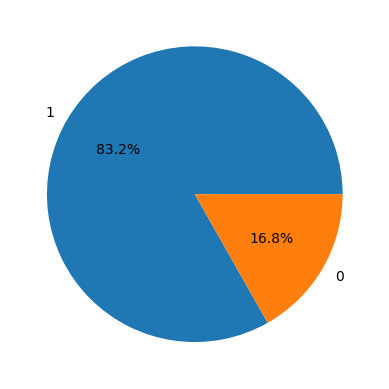

In [8]:
plt.pie(df["target"].value_counts().values,
       labels = df["target"].value_counts().index,
       autopct='%1.1f%%')
plt.show()

In [24]:
df.dtypes



AttributeError: 'NoneType' object has no attribute 'dtypes'

In [50]:
y=df["target"]
X=df["tweet"]

In [51]:
X = pd.get_dummies(X)

In [11]:
X = X*1
X.head()


,0 hoes 128588,01takesthelead bitch use whipers,05235fd083ad408 hick yes,05professor bet hes starbucks queer,05professor charlie sheen could coach better crusty dusty yeah hired bryan price pitching coach,05professor thats happens getting pussy pussy twitter seems like clear cut choice hahahaha,0beythelau huntermoore bitch gross fuck touchin saggy titties,0ddment could fuck bowl graham cracker cereal,0hallis0n bitch caught body week ago everybody catching bullet holes,0o faggot,...,zooyorkinit youre frumpy bitch,zp3 little girl tom sawyer gets trapped cave along injun joe almost die injun joe dies find treasure,zramsin betodavidthomas go fuck self pussy 128536,zrexxx slowdollaz take bitch recieve head mom,zt0mm lucky monkey,ztsupreme uncr4fted yopapichulo doesnt matter joke fact still remains hes faggot pretending girl,zuko gets bitches,zwaaad fag,zwengersierra bitch,zzzentropy guynamedjordan bitch boys
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X.shape

(24783, 24699)

In [17]:
X.dtypes

Series([], dtype: object)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 1)

In [54]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.fit(X_train_scaled, y_train)

In [ ]:
X_test_scaled.shape

In [ ]:
y_pred = knn.predict(X_test_scaled)


In [ ]:
print(classification_report(y_pred,y_test))

In [ ]:
X.shape

In [ ]:
#use dropout regularization to prevent overfitting
nn_model = tf.keras.models.Sequential()
#input_dim is based on the number of columns in the dataset after removing the y values
nn_model.add(tf.keras.layers.Dense(units=91, activation ='relu', input_dim=24699)) 
nn_model.add(tf.keras.layers.Dense(units=51, activation ='relu'))
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train, epochs=15)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
nn_model.save('my_model.h5')

In [ ]:
from keras.models import load_model
model = load_model('my_model.h5')

In [29]:
df_tweets = pd.read_csv("Resources/processed_tweets.csv", encoding='latin-1', header=None)

In [30]:
df_tweets.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [31]:
df_tweets = df_tweets.rename(columns = {5: "tweets"})
df_tweets.head()

,0,1,2,3,4,tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [32]:
import re

In [33]:
for i in df_tweets.index:
    txt = df_tweets.loc[i]["tweets"]
    txt=re.sub(r'@[A-Z0-9a-z_:]+','',txt)#replace username-tags
    txt=re.sub(r'[RT]+','',txt)#replace RT-tags
    txt=re.sub('https?://[A-Za-z0-9./]+','',txt)#replace URLs
    df_tweets.at[i,"tweets"]=txt

In [34]:
df_tweets.head()

,0,1,2,3,4,tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Da..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am..."


In [35]:
df_tweets["tweets"] = df_tweets["tweets"].str.lower()

#removing punctuation
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '',punctuations_list)
    return text.translate(temp)
df_tweets['tweets'] = df_tweets['tweets'].apply(lambda x: remove_punctuations(x))
df_tweets.tail()

,0,1,2,3,4,tweets
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up having no school is the best feel...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,hewdbcom very cool to hear old walt interview...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover ask me fo...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time upa...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy charitytuesday


In [36]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    
    imp_words = []
    #store the important words
    for word in str(text).split():
        if word not in stop_words:
            #it's recommended to lemmatize the word as well
            #splitting it into its root which will provide a more accurate measure of which words are hate speech
            lemmatizer =WordNetLemmatizer()
            lemmatizer.lemmatize(word)
            imp_words.append(word)
    output = " ".join(imp_words)
    return output
df_tweets['tweets'] = df_tweets['tweets'].apply(lambda text: remove_stopwords(text))
df_tweets.head()

,0,1,2,3,4,tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww thats bummer shoulda got david carr hird day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving im mad cant see


In [ ]:
X.shape



In [37]:
n = 24783
df_tweets = df_tweets.iloc[:n]
df_tweets.head()

,0,1,2,3,4,tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww thats bummer shoulda got david carr hird day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving im mad cant see


In [38]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       24783 non-null  int64 
 1   1       24783 non-null  int64 
 2   2       24783 non-null  object
 3   3       24783 non-null  object
 4   4       24783 non-null  object
 5   tweets  24783 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


In [39]:
X_tweets = df_tweets["tweets"]

In [40]:
X_tweets = pd.get_dummies(X_tweets)

X_tweets.head()

,,0 followers,00 lightning thunder,0g milky bar left around 200ml coke,0h bc metro,0n h0me fr0m iendesitas bought birds supplies txt dan today,1 6 previous friends colleagues bs going lose jobs newsscotland7987659stm,1 day spring break wish could lasted 4evr,1 day till easter fair two days two exams till easter break,1 death 1 miscarried n 1 still critical condition v grave,...,zombie mode today kids ill kept till 230am work 6am,zombie twitter accounts following,zoo hopefully going tonight though,zurich smelly bags anymore,ï ï¿½k pouty face shitty day boston ugh wonder im sick,ï¿½ friend home texted ai pa lotra,ï¿½11 spend,ï¿½356 make poorly car better oh well worse things happen anyone got odd jobs meeee lol x,ï¿½ber sick rying muster strength head work,ï¿½i bï¿½c hi hoi th lï¿½ giï¿½ cuc ri mï¿½nh vn cï¿½n nh cï¿½i nhï¿½ tp th bï¿½ tï¿½ ca bï¿½c ï¿½ ch ri
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
X_tweets = X_tweets * 1 
X_tweets.head()

,,0 followers,00 lightning thunder,0g milky bar left around 200ml coke,0h bc metro,0n h0me fr0m iendesitas bought birds supplies txt dan today,1 6 previous friends colleagues bs going lose jobs newsscotland7987659stm,1 day spring break wish could lasted 4evr,1 day till easter fair two days two exams till easter break,1 death 1 miscarried n 1 still critical condition v grave,...,zombie mode today kids ill kept till 230am work 6am,zombie twitter accounts following,zoo hopefully going tonight though,zurich smelly bags anymore,ï ï¿½k pouty face shitty day boston ugh wonder im sick,ï¿½ friend home texted ai pa lotra,ï¿½11 spend,ï¿½356 make poorly car better oh well worse things happen anyone got odd jobs meeee lol x,ï¿½ber sick rying muster strength head work,ï¿½i bï¿½c hi hoi th lï¿½ giï¿½ cuc ri mï¿½nh vn cï¿½n nh cï¿½i nhï¿½ tp th bï¿½ tï¿½ ca bï¿½c ï¿½ ch ri
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X_tweets.shape

(24783, 24136)

In [57]:
missing_columns = 241 
for col in missing_columns:
    X_tweets[col] = 0

TypeError: 'int' object is not iterable

In [ ]:
missing_columns = 241 
for col in missing_columns:
    X_tweets[col] == 0

In [55]:
X_test_scaled.shape



(6196, 24699)

In [27]:
X_tweets.shape 


NameError: name 'X_tweets' is not defined

In [ ]:
X_tweets = X_tweets.drop(X_tweets.index[:18587],inplace= True) 

In [56]:

additional_length = 241 
X_tweets_extended = np.append(X_tweets, np.full(additional_length, np.nan))

In [58]:
X_tweets_extended.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'